<a href="https://colab.research.google.com/github/lawesworks/vision-model-workbench/blob/main/vision_yolo_detect_fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# CONFIGURATION

# Roboflow Model Settings
Roboflow_Workspace_Name = "-jwzpw"
Roboflow_Project_Name = "continuous_fire"
Roboflow_Project_Version = 1

# YOLO Model Settings
YOLO_Model_Version = "yolov8"
YOLO_Model_Size = "n"

# Training Hyper-parameters
Config_Epochs = 30
Config_Image_Size = 640
Config_Batch_Size = 16

# Derived Parameters
Roboflow_Project_Folder = Roboflow_Project_Name+"-"+str(Roboflow_Project_Version)
#Config_Predict_Folder = "runs/detect/predict"


print(f"""
===== Training Configuration =====

Workspace        : {Roboflow_Workspace_Name}
Project          : {Roboflow_Project_Name}
Project Folder   : {Roboflow_Project_Folder}
Dataset Version  : {Roboflow_Project_Version}

Model            : {YOLO_Model_Version}
Model Size       : {YOLO_Model_Size}
Epochs           : {Config_Epochs}
Image Size       : {Config_Image_Size}
Batch Size       : {Config_Batch_Size}

==================================
""")


===== Training Configuration =====

Workspace        : -jwzpw
Project          : continuous_fire
Project Folder   : continuous_fire-1
Dataset Version  : 1

Model            : yolov8
Model Size       : n
Epochs           : 30
Image Size       : 640
Batch Size       : 16
      



In [2]:
import os
from google.colab import userdata
api_key = userdata.get('ROBOFLOW_API_KEY')

if api_key is None:
    raise ValueError("ROBOFLOW_API_KEY not found. Check Colab Secrets.")

print("Roboflow API Key Loaded Successfully")

Roboflow API Key Loaded Successfully


In [3]:
# Install Ultralytics

!pip install -q roboflow ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 93.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 143.4 MB/s eta 0:00:00


In [16]:
# Load Libraries Commonly Used
import os
from IPython.display import Image

In [4]:
# Import the Dataset you'll use to train your model

from roboflow import Roboflow


rf = Roboflow(api_key=api_key )
project = rf.workspace(Roboflow_Workspace_Name).project(Roboflow_Project_Name)
dataset = project.version(Roboflow_Project_Version).download(YOLO_Model_Version)  # adjust version if needed

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to continuous_fire-1 in yolov8:: 100%|██████████| 3492/3492 [00:00<00:00, 12200.44it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [10]:

# get location of the yaml file, you'll copy an paste it into the next cell

import glob

#yaml_files = glob.glob("/content/**/data.yaml", recursive=True)
yaml_files = glob.glob(f"/content/{Roboflow_Project_Folder}/data.yaml", recursive=True)

if not yaml_files:
    raise FileNotFoundError("No data.yaml file found")

DATA_YAML_PATH = yaml_files[0]

print(f"Using dataset config: {DATA_YAML_PATH}")

Using dataset config: /content/continuous_fire-1/data.yaml


In [6]:
# train your model on the data
# prior to training, you might want to make sure you are connected to a GPU
# adjust your epochs as needed ( if demoing to a prospect ).  More epocs more means  More training time

from ultralytics import YOLO

DATA_YAML_PATH = DATA_YAML_PATH

model = YOLO("yolov8n.pt")  # small + fast starter model
results = model.train(
    data=DATA_YAML_PATH,
    epochs=Config_Epochs,
    imgsz=Config_Image_Size,
    batch=Config_Batch_Size
)


Ultralytics 8.4.11 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/continuous_fire-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, persp

In [11]:
# get location of the weights for the latest training

pt_files = glob.glob("runs/detect/train*/weights/best.pt", recursive=True)

if not pt_files:
    raise FileNotFoundError("No best.pt file found")

MODEL_PT_PATH = pt_files[0]

print(f"Using PT File: {MODEL_PT_PATH}")

Using PT File: runs/detect/train/weights/best.pt


In [22]:
# run the model against the test data in your project

best_model_path = glob.glob(MODEL_PT_PATH)[-1]
model = YOLO(best_model_path)

model.predict(source = Roboflow_Project_Folder + "/test/images", save=True, conf=0.25)

predict_dirs = sorted(
    glob.glob("runs/detect/predict*"),
    key=os.path.getmtime
)

PREDICT_DIR = predict_dirs[-1]
print(f"\n\nUsing predictions from: {PREDICT_DIR}")



image 1/160 /content/continuous_fire-1/test/images/Img_25838_jpg.rf.5367ada030e33cfec5a50f8f5c0790bc.jpg: 640x640 1 fire, 7.2ms
image 2/160 /content/continuous_fire-1/test/images/Img_25840_jpg.rf.913cc489e8df0fd2b5a37fda81919dec.jpg: 640x640 1 fire, 7.2ms
image 3/160 /content/continuous_fire-1/test/images/Img_25853_jpg.rf.149d98e7b56b1eb641fed000d17619c7.jpg: 640x640 1 fire, 7.2ms
image 4/160 /content/continuous_fire-1/test/images/Img_25857_jpg.rf.844aefecdb178158ff53d4bbfa5cd8bd.jpg: 640x640 1 fire, 7.2ms
image 5/160 /content/continuous_fire-1/test/images/Img_25867_jpg.rf.93e99124eb555118dacdf74f25fe00f6.jpg: 640x640 1 fire, 7.2ms
image 6/160 /content/continuous_fire-1/test/images/Img_25874_jpg.rf.448cf89920f9e43ae1e202b0f7bc70d6.jpg: 640x640 1 fire, 7.2ms
image 7/160 /content/continuous_fire-1/test/images/Img_25875_jpg.rf.e6dd3e5f180f3250cfeec1d24ccd913e.jpg: 640x640 1 fire, 7.2ms
image 8/160 /content/continuous_fire-1/test/images/Img_25882_jpg.rf.b1f12484bcdc981e180d976cab1cfec1.jp

In [23]:
image_paths = glob.glob(os.path.join(PREDICT_DIR, "*.jpg")) + \
              glob.glob(os.path.join(PREDICT_DIR, "*.png"))

image_paths = sorted(image_paths)

print(f"Found {len(image_paths)} predicted images")

Found 160 predicted images


In [34]:
# MatplotLib Function for Image Grid (Left → Right, Row Wrap) that will create a grid of Images saved to the Predicted Folder

import math
import matplotlib.pyplot as plt
from PIL import Image

def show_image_grid_paged(image_paths, cols=5, per_page=20, page=1, figsize_per_cell=3):
    """
    Display images in a true grid, paged.
    - cols: images per row
    - per_page: total images per page
    - page: 1-based page index
    - figsize_per_cell: size multiplier per grid cell
    """
    if not image_paths:
        print("No images to display.")
        return

    start = (page - 1) * per_page
    end = min(start + per_page, len(image_paths))
    page_paths = image_paths[start:end]

    rows = math.ceil(len(page_paths) / cols)
    fig_w = cols * figsize_per_cell
    fig_h = rows * figsize_per_cell

    fig, axes = plt.subplots(rows, cols, figsize=(fig_w, fig_h))
    axes = axes.flatten() if isinstance(axes, (list, tuple)) is False else axes

    # If only one subplot, axes may not be iterable the same way
    try:
        axes = axes.flatten()
    except Exception:
        axes = [axes]

    for ax in axes:
        ax.axis("off")

    for ax, img_path in zip(axes, page_paths):
        img = Image.open(img_path).convert("RGB")
        ax.imshow(img)
        ax.axis("off")

    plt.tight_layout()
    plt.show()

    print(f"Showing images {start+1}–{end} of {len(image_paths)} (page {page})")

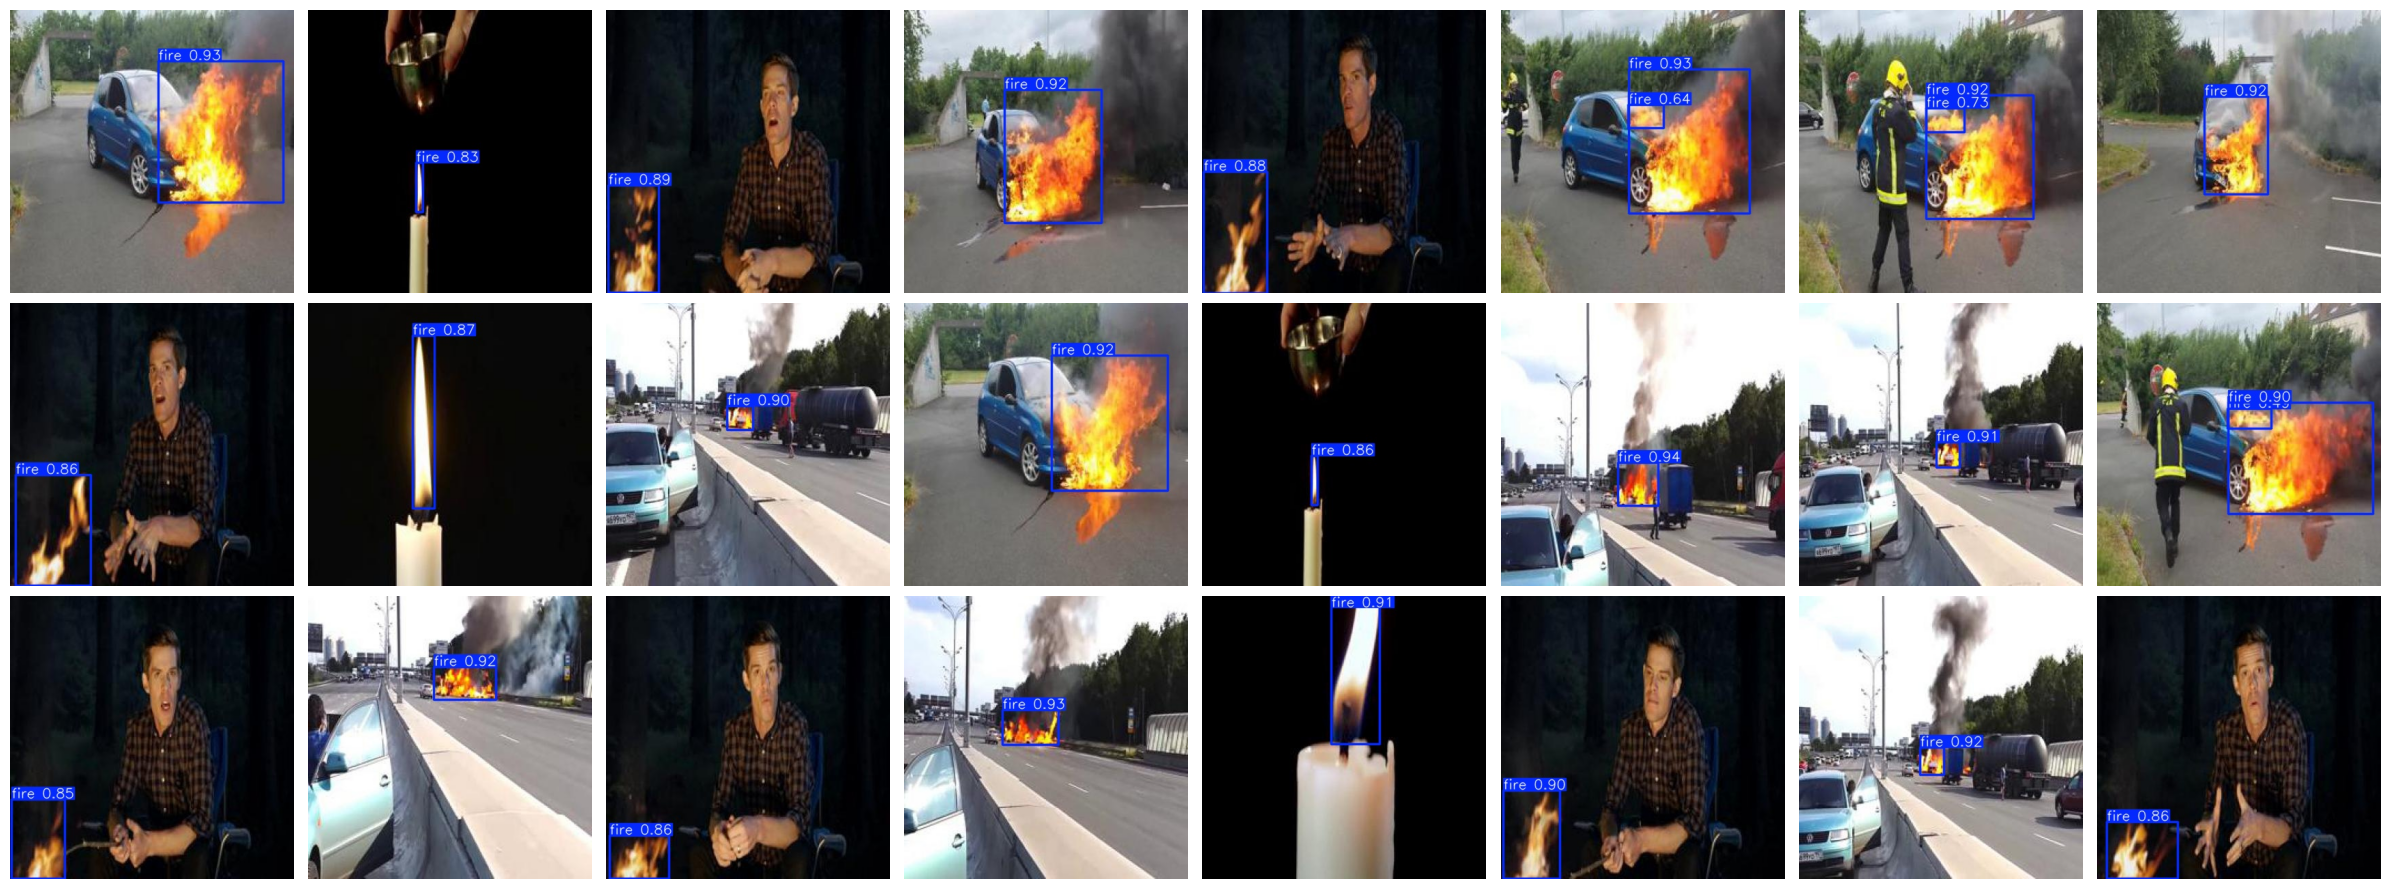

Showing images 1–24 of 160 (page 1)


In [36]:
# Show images in the Recent Predictions Folder

# Example: show first 20 images, 5 per row
show_image_grid_paged(image_paths, cols=8, per_page=24, page=1)
#print("\n\nPage 2")
#show_image_grid_paged(image_paths, cols=5, per_page=20, page=2)


In [33]:
# Filenames are fine, but only if you keep them small and short - this version truncates titles

def show_image_grid_with_short_titles(image_paths, cols=5, per_page=20, page=1, figsize_per_cell=3):
    import math
    import matplotlib.pyplot as plt
    from PIL import Image

    start = (page - 1) * per_page
    end = min(start + per_page, len(image_paths))
    page_paths = image_paths[start:end]

    rows = math.ceil(len(page_paths) / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(cols*figsize_per_cell, rows*figsize_per_cell))
    try:
        axes = axes.flatten()
    except Exception:
        axes = [axes]

    for ax in axes:
        ax.axis("off")

    for ax, img_path in zip(axes, page_paths):
        img = Image.open(img_path).convert("RGB")
        ax.imshow(img)
        ax.axis("off")
        ax.set_title(os.path.basename(img_path)[:18], fontsize=7)  # truncate title

    plt.tight_layout()
    plt.show()
    print(f"Showing images {start+1}–{end} of {len(image_paths)} (page {page})")

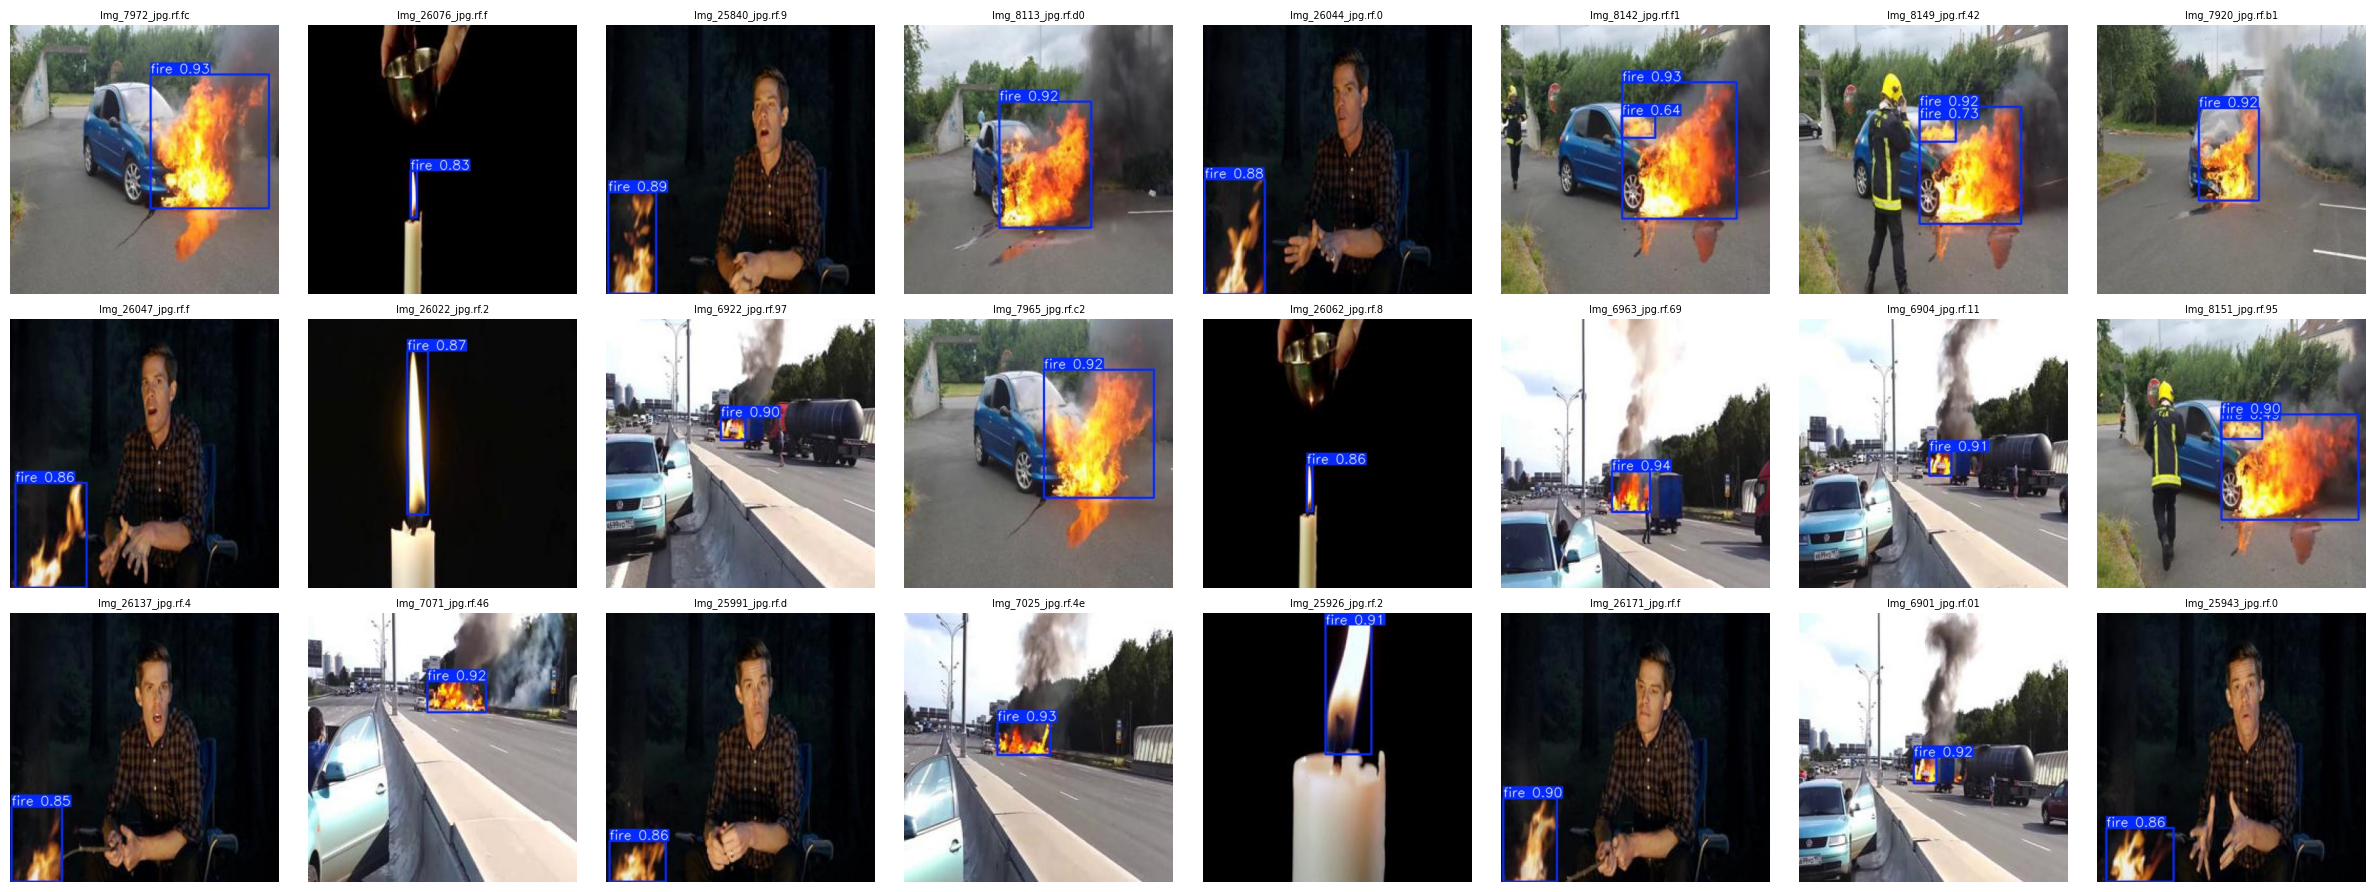

Showing images 1–24 of 160 (page 1)


In [37]:
# Example: show first 20 images with titles, 5 per row
show_image_grid_with_short_titles(image_paths, cols=8, per_page=24, page=1)

In [18]:
# you can upload an image into your Google Colab content folder and run a model against it
# how did it perform.  If it failed, can you explain what that might have happened?

model.predict(source="/content/fire.jpg", save=True, conf=0.25)


image 1/1 /content/fire.jpg: 352x640 1 fire, 6.6ms
Speed: 2.2ms preprocess, 6.6ms inference, 1.6ms postprocess per image at shape (1, 3, 352, 640)
Results saved to /content/runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'fire'}
 obb: None
 orig_img: array([[[192, 196, 197],
         [192, 196, 197],
         [192, 196, 197],
         ...,
         [ 77, 108, 199],
         [ 77, 108, 199],
         [ 77, 108, 199]],
 
        [[192, 196, 197],
         [192, 196, 197],
         [192, 196, 197],
         ...,
         [ 77, 108, 199],
         [ 77, 108, 199],
         [ 77, 108, 199]],
 
        [[192, 196, 197],
         [192, 196, 197],
         [192, 196, 197],
         ...,
         [ 77, 108, 199],
         [ 77, 108, 199],
         [ 77, 108, 199]],
 
        ...,
 
        [[ 72, 138, 143],
         [ 72, 138, 143],
         [ 73, 139, 144],
         ...,
         [ 27,  97,  91],
         [ 29,  99,  93],
         [ 30, 100,  94]],
 
        [[ 70, 136, 141],
         [ 71, 137, 142],
         [ 73, 139, 144],
         ...,
         [ 27,  97, 

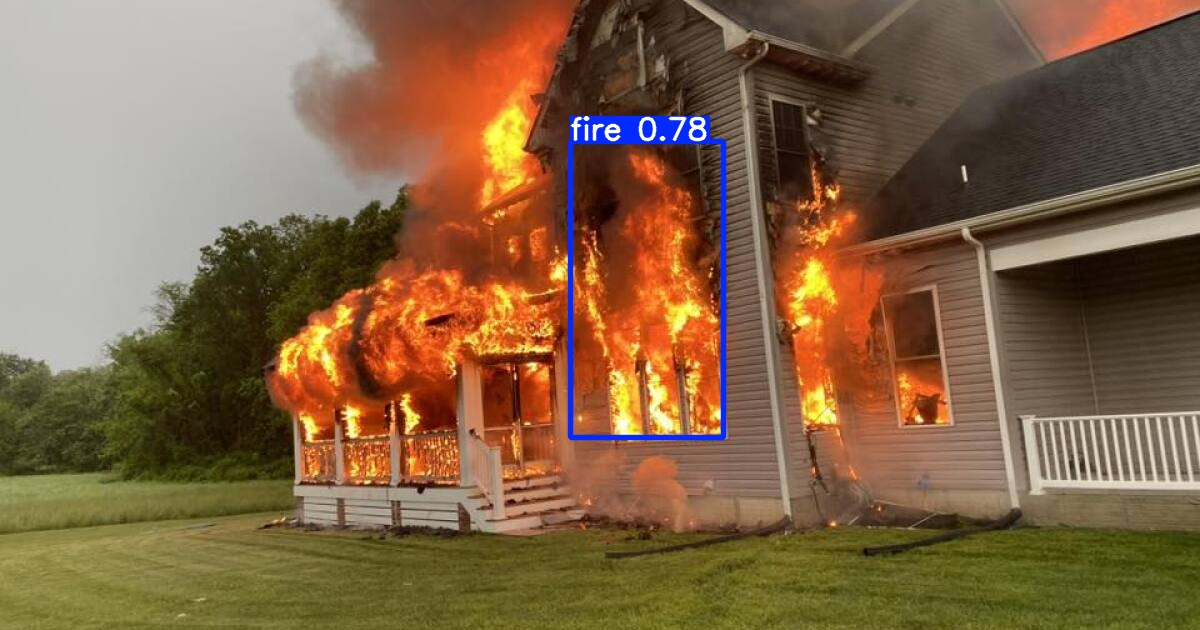

In [19]:
# View a screenshot of the annotated result
Image(filename=f'/content/runs/detect/predict/fire.jpg', width=600)

In [ ]:
# View a screenshot of the training plots (Loss Function plots / Accuracy)

Image(filename=f'/content/runs/detect/train3/results.png', width=600)

In [ ]:
# View a screenshot of the Confusio Matrix

Image(filename=f'/content/runs/detect/train3/confusion_matrix.png', width=600)

In [ ]:
# View metrics of the training

model.val(data=DATA_YAML_PATH)